In [ ]:
import pcl 
from open3d import *
import numpy as np 
from scipy.cluster.vq import kmeans2, whiten
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
import pandas as pd
import pptk

#### load input pointcloud  ###

p = pcl.load("./dataset/table_scene_lms400.pcd")

###  remove outliers   ###

fil = p.make_statistical_outlier_filter()
fil.set_mean_k(50)
fil.set_std_dev_mul_thresh(1.0)

pcl.save(fil.filter(), "./dataset/table_scene_lms400_inliers.pcd")

fil.set_negative(True)
pcl.save(fil.filter(), "./dataset/table_scene_lms400_outliers.pcd")


if __name__ == "__main__":
	pcd = read_point_cloud("./dataset/table_scene_lms400_inliers.pcd")
	draw_geometries([pcd])
	print(pcd)


###  start k-means clustering  ###

data = read_point_cloud("./dataset/table_scene_lms400_inliers.pcd")

a = np.asarray(data.points)
fig = plt.figure()
ax = Axes3D(fig)
x, y = kmeans2(whiten(a), 3, iter = 20)
print(x)
print(y)   
ax.scatter(a[:,0], a[:,1], a[:,2], c=y, alpha=0.33333);
fig.savefig('./Results/point_plot_mug.png')
plt.show()

### extract the cluster of interest ###



In [3]:
i=1;
c_1= np.zeros((451410,3));
c_2= np.zeros((451410,3));
c_3= np.zeros((451410,3));

for i in range (1,451410) :
    if (y[i]==0):
        c_1[i,:] = a[i,:];
        #print("condition satisfied")
    
    if (y[i]==1):
        c_2[i,:] = a[i,:];
        
    if (y[i]==2):
        c_3[i,:] = a[i,:];
        

done


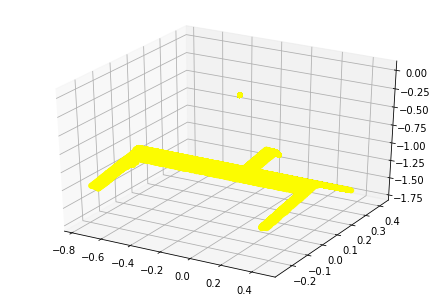

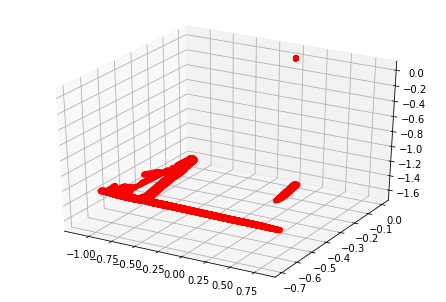

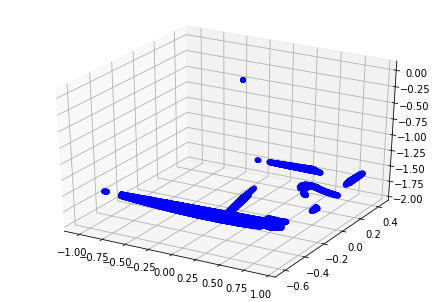

In [4]:
fig1 = plt.figure()
axc_1 = Axes3D(fig1)
axc_1.scatter(c_1[:,0],c_1[:,1],c_1[:,2],c='yellow', alpha=0.33333)
#plt.show()
v1 = pptk.viewer(c_1)


fig2 = plt.figure()
axc_2 = Axes3D(fig2)
axc_2.scatter(c_2[:,0],c_2[:,1],c_2[:,2],c='red', alpha=0.33333)
#fig2.savefig('./Results/point_plot_segmented.png')
#v2 = pptk.viewer(c_2)
#plt.show()


fig3 = plt.figure()
axc_3 = Axes3D(fig3)
axc_3.scatter(c_3[:,0],c_3[:,1],c_3[:,2],c='blue', alpha=0.33333)
#plt.show()
#v3 = pptk.viewer(c_3)


In [5]:
pcd = PointCloud()
pcd.points = Vector3dVector(c_1)
write_point_cloud("./Results/extracted_table_mug.pcd",pcd)


data = pcl.load("./Results/extracted_table_mug.pcd")


cloud = pcl.PointCloud(np.asarray((data), dtype = np.float32))

seg = cloud.make_segmenter_normals(ksearch=50)
seg.set_optimize_coefficients(True)
seg.set_model_type(pcl.SACMODEL_PLANE)
seg.set_normal_distance_weight(0.05)
seg.set_method_type(pcl.SAC_RANSAC)
seg.set_max_iterations(100)
seg.set_distance_threshold(0.005)
inliers, model = seg.segment()

cloud_plane = cloud.extract(inliers, negative=False)
pcl.save(cloud_plane, './Results/table_segmented.pcd')


segment = read_point_cloud('./Results/table_segmented.pcd')
draw_geometries([segment])






and it is done!
<PointCloud of 451410 points>


In [6]:
cloud_cyl = pcl.PointCloud(np.asarray((data), dtype = np.float32))

seg = cloud_cyl.make_segmenter_normals(ksearch=50)
seg.set_optimize_coefficients(True)
seg.set_model_type(pcl.SACMODEL_CYLINDER)
seg.set_normal_distance_weight(0.1)
seg.set_method_type(pcl.SAC_RANSAC)
seg.set_max_iterations(10000)
seg.set_distance_threshold(0.05)
seg.set_radius_limits(0, 0.1)
inliers, model = seg.segment()


cloud_cylinder = cloud_cyl.extract(inliers, negative=False)
pcl.save(cloud_cylinder, './Results/table_scene_mug_stereo_textured_cylinder_cyl_segmented.pcd')

segment = read_point_cloud('./Results/table_scene_mug_stereo_textured_cylinder_cyl_segmented.pcd')
draw_geometries([segment])



yeay!
